In [1]:
%run moon_code
with open('학습준비파일_20181013.pickle', 'rb') as handle:
    store = pickle.load(handle)
train, test, X_li, scl_X_li, target_li = store
%run xgb_modelfit
scl_li = scl_X_li.copy()
for ix, i in enumerate(scl_X_li):
    if (i.find('returns') != -1) or (i.find('his') != -1) or (i.find('pct') != -1):
        scl_li[ix] = scl_X_li[ix][4:]
origin_X = [i for i in X_li if i.find('returns') != 0]
origin_scl_X = [i for i in scl_li if i.find('returns') != 0]

In [20]:
test['삼성전자'][['Close','pct_change']].loc['2017-06-30':]

,Close,pct_change
Date,,
2017-06-30,47540.0,-0.008344
2017-07-03,47220.0,-0.006731
2017-07-04,47000.0,-0.004659
2017-07-05,47580.0,0.012340
2017-07-06,48060.0,0.010088
2017-07-07,47860.0,-0.004161
2017-07-10,48660.0,0.016715
2017-07-11,49000.0,0.006987
2017-07-12,49880.0,0.017959


In [2]:
import warnings
warnings.filterwarnings(action='ignore')

# Feature Selected

In [7]:
predictors = [
    'returnsClosePrevRaw10',
    'Volume',
    'pct_change',
    'returnsOpenPrevRaw10',
    'his_vol_7'
]
scl_predictors = [
    'returnsClosePrevRaw10',
    'scl_Volume',
    'pct_change',
    'returnsOpenPrevRaw10',
    'his_vol_7'
]
target = 'Y3'

In [4]:
result, fi_dict = temp_calc_feature_importance(alg, train, test, predictors, target)

In [5]:
pd.DataFrame(result, index=['acc','f1','pre','rec','auc'])

,KB금융,LG화학,NAVER,POSCO,SK텔레콤,SK하이닉스,삼성전자,삼성중공업,셀트리온,현대건설,현대글로비스,현대차
acc,0.706612,0.764463,0.756303,0.776860,0.752066,0.727273,0.701245,0.698347,0.702479,0.752066,0.752066,0.690083
f1,0.700422,0.794224,0.715686,0.795455,0.739130,0.765957,0.714286,0.672646,0.755102,0.772727,0.732143,0.654378
pre,0.685950,0.797101,0.708738,0.820312,0.752212,0.776978,0.750000,0.700935,0.816176,0.766917,0.759259,0.657407
rec,0.715517,0.791367,0.722772,0.772059,0.726496,0.755245,0.681818,0.646552,0.702532,0.778626,0.706897,0.651376
auc,0.706965,0.759761,0.751897,0.777539,0.751248,0.721057,0.703294,0.696292,0.702456,0.749673,0.750274,0.686590


In [6]:
pd.DataFrame(result, index=['acc','f1','pre','rec','auc']).mean(1)

acc    0.731655
f1     0.734346
pre    0.749332
rec    0.720938
auc    0.729754
dtype: float64

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [9]:
xgb_clf = XGBClassifier(random_state=42)
log_clf = LogisticRegression()
svm_clf = SVC()
rf_clf = RandomForestClassifier(random_state=42)
gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()

models=[xgb_clf,rf_clf,log_clf,svm_clf,dt_clf,gnb_clf,knn_clf]
model_name=['xgb','rf','log','svm','dt','gnb','knn']

__스케일 조정 X__

In [64]:
result, conf_mx = multi_modelfit_with_score(train, test, models, model_name, dtrain=True,
                                            X=predictors, y=target)

In [58]:
res1 = {}
for name in model_name:
    temp = {}
    for key, di in result.items():
        temp[key] = di['xgb']
    res1[name] = temp

In [59]:
respd = pd.DataFrame(index=['arr','pre','rec','f1','auc'], columns=list(result.keys())).fillna(0)
for model in res1.keys():
    respd += pd.DataFrame(res1[model], index=['arr','pre','rec','f1','auc'])
respd / 7

,KB금융,LG화학,NAVER,POSCO,SK텔레콤,SK하이닉스,삼성전자,삼성중공업,셀트리온,현대건설,현대글로비스,현대차
arr,0.752066,0.772727,0.747899,0.735537,0.723140,0.735537,0.705394,0.685950,0.710744,0.768595,0.747934,0.677686
pre,0.747967,0.807407,0.700935,0.742424,0.691667,0.769784,0.692913,0.644860,0.703704,0.793893,0.700855,0.631579
rec,0.760331,0.789855,0.728155,0.765625,0.734513,0.769784,0.733333,0.644860,0.838235,0.781955,0.759259,0.666667
f1,0.754098,0.798535,0.714286,0.753846,0.712446,0.769784,0.712551,0.644860,0.765101,0.787879,0.728889,0.648649
auc,0.835223,0.826853,0.817152,0.826823,0.798038,0.801076,0.796384,0.777639,0.773585,0.843174,0.819721,0.752833


In [60]:
respd = pd.DataFrame(index=['arr','pre','rec','f1','auc'], columns=list(res1.keys())).fillna(0)
for name in result.keys():
    respd += pd.DataFrame(result[name], index=['arr','pre','rec','f1','auc'])
respd / 12

,xgb,rf,log,svm,dt,gnb,knn
arr,0.730268,0.706477,0.510409,0.508003,0.657854,0.507718,0.510085
pre,0.718999,0.713834,0.464266,0.587429,0.654987,0.533508,0.510488
rec,0.747714,0.681977,0.916667,0.664290,0.662446,0.568367,0.577171
f1,0.732577,0.696643,0.614943,0.450117,0.657987,0.484378,0.539799
auc,0.805708,0.774372,0.510099,0.501015,0.655560,0.507472,0.508672


__스케일 조정 O__

In [99]:
result2, conf_mx2 = multi_modelfit_with_score(train, test, models, model_name, dtrain=True,
                                            X=scl_predictors, y=target)

In [61]:
res2 = {}
for name in model_name:
    temp = {}
    for key, di in result2.items():
        temp[key] = di['xgb']
    res2[name] = temp

In [62]:
respd = pd.DataFrame(index=['arr','pre','rec','f1','auc'], columns=list(result2.keys())).fillna(0)
for model in res2.keys():
    respd += pd.DataFrame(res2[model], index=['arr','pre','rec','f1','auc'])
respd / 7

,KB금융,LG화학,NAVER,POSCO,SK텔레콤,SK하이닉스,삼성전자,삼성중공업,셀트리온,현대건설,현대글로비스,현대차
arr,0.752066,0.772727,0.747899,0.735537,0.723140,0.735537,0.705394,0.685950,0.710744,0.768595,0.747934,0.677686
pre,0.747967,0.807407,0.700935,0.742424,0.691667,0.769784,0.692913,0.644860,0.703704,0.793893,0.700855,0.631579
rec,0.760331,0.789855,0.728155,0.765625,0.734513,0.769784,0.733333,0.644860,0.838235,0.781955,0.759259,0.666667
f1,0.754098,0.798535,0.714286,0.753846,0.712446,0.769784,0.712551,0.644860,0.765101,0.787879,0.728889,0.648649
auc,0.835223,0.826853,0.817152,0.826823,0.798038,0.801076,0.796384,0.777639,0.773585,0.843174,0.819721,0.752833


In [63]:
respd = pd.DataFrame(index=['arr','pre','rec','f1','auc'], columns=list(res2.keys())).fillna(0)
for name in result2.keys():
    respd += pd.DataFrame(result2[name], index=['arr','pre','rec','f1','auc'])
respd / 12

,xgb,rf,log,svm,dt,gnb,knn
arr,0.730268,0.706477,0.711639,0.648383,0.659862,0.718544,0.647820
pre,0.718999,0.713834,0.693984,0.644594,0.654818,0.733634,0.636716
rec,0.747714,0.681977,0.744189,0.733103,0.675549,0.689653,0.685609
f1,0.732577,0.696643,0.717042,0.668656,0.664043,0.705159,0.658780
auc,0.805708,0.774372,0.788237,0.742988,0.658108,0.788934,0.687724


# Y 탐색

In [3]:
with open('raw_data_20181008.pickle', 'rb') as handle:
    raw_data = pickle.load(handle)
copy_key = list(raw_data.keys())
for stock in copy_key:
    if stock not in train.keys():
        del raw_data[stock]

In [4]:
alg.n_estimators

1000

In [5]:
with open('ks11_20181008.pickle', 'rb') as handle:
    ks11 = pickle.load(handle)
    
ks11['returnsClosePrevRaw1'] = np.log(ks11.Open / ks11.Close.shift(1))
ks11['returnsClosePrevRaw10'] = np.log(ks11.Open / ks11.Close.shift(10))
ks11['returnsOpenPrevRaw1'] = np.log(ks11.Open / ks11.Open.shift(1))
ks11['returnsOpenPrevRaw10'] = np.log(ks11.Open / ks11.Open.shift(10))

kospi_index_del = ks11[ks11.Volume == 0][ks11.columns[:6]].index

for key, df in raw_data.items():
    raw_data[key] = df.drop(ks11[ks11.Volume == 0][ks11.columns[:6]].index, axis=0)
    
for key, df in raw_data.items():
    raw_data[key] = df.drop(df.index[np.where(df.Volume==0)[0]], axis=0)
    
for key, df in raw_data.items():
    df["pct_change"] = df.Close.pct_change()
    for i in range(3, 31):
        df["close_ma_{}".format(i)] = df.Close.rolling(window = i).mean()
        df["volume_ma_{}".format(i)] = df.Volume.rolling(window = i).mean()
    for i in [7, 21, 30, 60, 90, 91, 100, 120]:
        df["his_vol_{}".format(i)] = df["pct_change"].rolling(window = i).std()*(252**0.5)
    df['returnsClosePrevRaw1'] = np.log(df.Open / df.Close.shift(1))
    df['returnsClosePrevRaw10'] = np.log(df.Open / df.Close.shift(10))
    df['returnsOpenPrevRaw1'] = np.log(df.Open / df.Open.shift(1))
    df['returnsOpenPrevRaw10'] = np.log(df.Open / df.Open.shift(10))
    df['returnsClosePrevMktres1'] = df['returnsClosePrevRaw1'] - ks11['returnsClosePrevRaw1']
    df['returnsClosePrevMktres10'] = df['returnsClosePrevRaw10'] - ks11['returnsClosePrevRaw10']
    df['returnsOpenPrevMktres1'] = df['returnsOpenPrevRaw1'] - ks11['returnsOpenPrevRaw1']
    df['returnsOpenPrevMktres10'] = df['returnsOpenPrevRaw10'] - ks11['returnsOpenPrevRaw10']
    """
    Y
    """
    df['Y1'] = np.where(df.Close - df.Close.shift(1).rolling(7).mean()>=0,1,0)
    df['Y2'] = np.where(df['pct_change'] - df['pct_change'].shift(1).rolling(7).mean()>=0,1,0)
    df['Y3'] = np.where(df.Close.rolling(7).mean() - df.Close.shift(1).rolling(7).mean()>=0,1,0)
    df['returnsOpenNextMktres10'] = df['returnsOpenPrevMktres10']
    df['Y'] = np.where(df['returnsOpenNextMktres10']>=0,1,0)

In [8]:
stock_model = {}
for stock in train.keys():
#     alg = XGBClassifier(
#          learning_rate =0.15,
#          n_estimators=1000,
#          max_depth=5,
#          min_child_weight=2,
#          gamma=0,
#          subsample=0.8,
#          colsample_bytree=0.8,
#          objective= 'binary:logistic',
#          nthread=4,
#          scale_pos_weight=1,
#          seed=27)
    model, fi = modelfit(alg, train[stock], predictors, target,
            cv_folds=5, early_stopping_rounds=20,
            figure=False, model_report=False)
    stock_model[stock] = model

In [9]:
pred = {}
for stock in raw_data.keys():
    pred[stock] = stock_model[stock].predict(raw_data[stock][predictors].loc['2017-07-01':])
for stock in pred.keys():
    pred[stock] = pd.Series(pred[stock], index=raw_data[stock].loc['2017-07-01':].index, dtype='int32')

In [10]:
y_true = {}
for stock in raw_data.keys():
    y_true[stock] = raw_data[stock]['Y3'].loc['2017-07-01':]

In [11]:
ks11["pct_change"] = ks11.Close.pct_change()

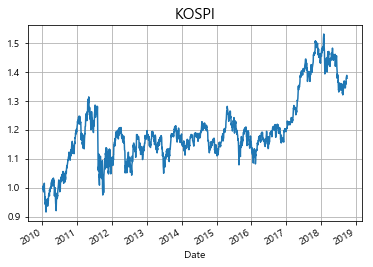

In [12]:
(ks11['pct_change'] + 1).cumprod().plot()
plt.grid(True)
plt.title('KOSPI', fontsize=15)
plt.show()

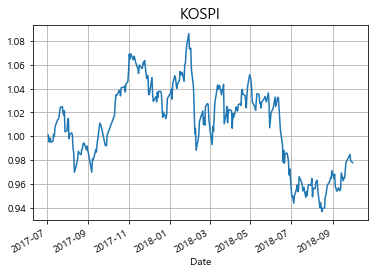

In [13]:
(ks11['pct_change'].loc['2017-07-01':] + 1).cumprod().plot()
plt.grid(True)
plt.title('KOSPI', fontsize=15)
plt.show()

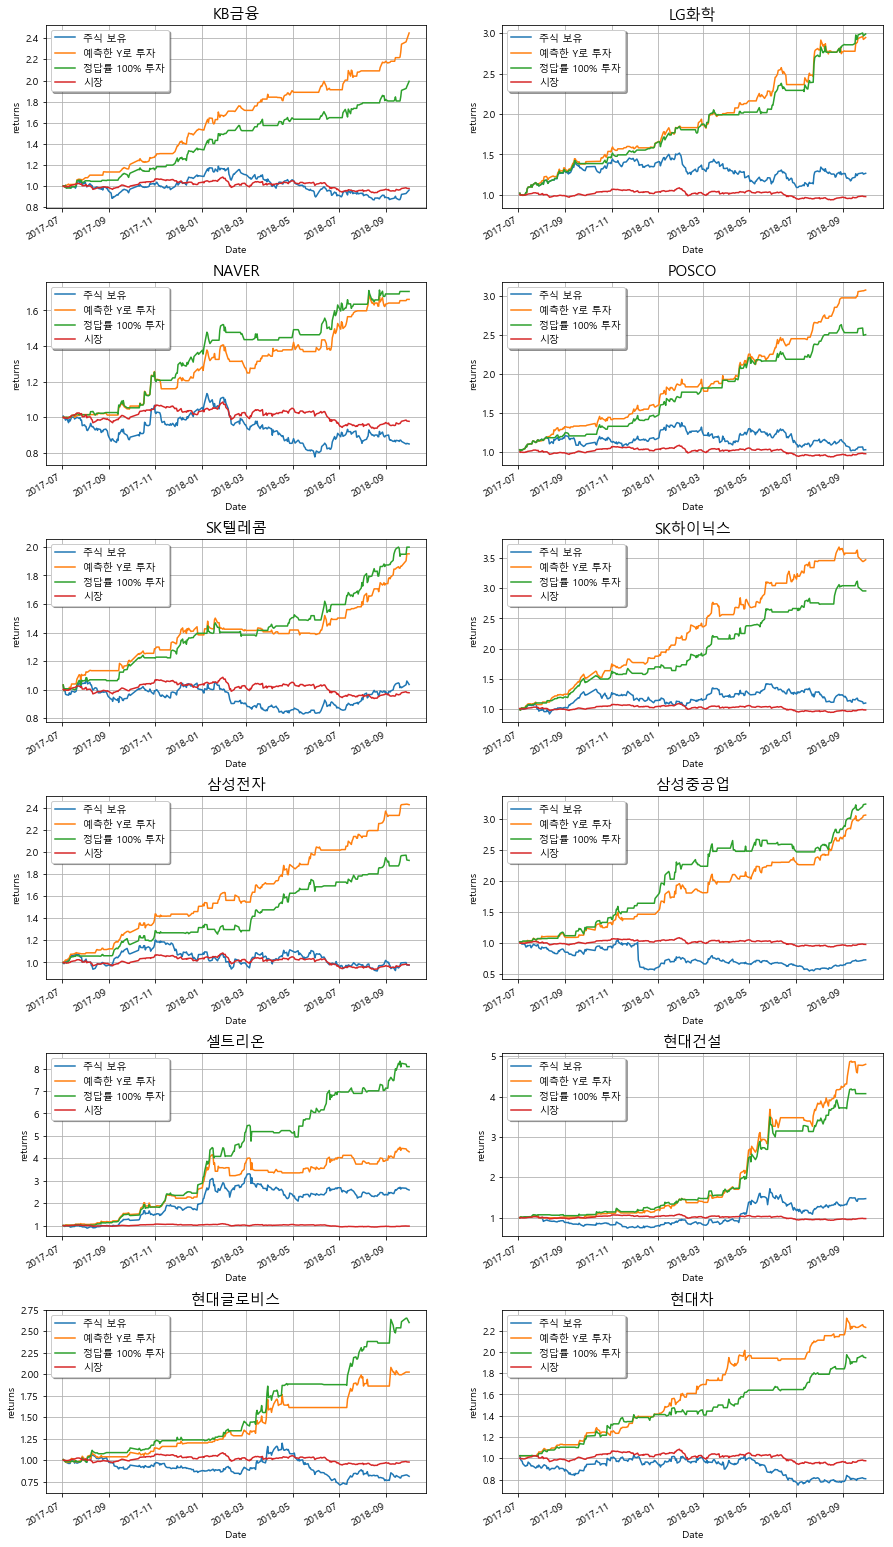

In [14]:
plt.figure(figsize=(15,30))
for idx, stock in enumerate(raw_data.keys()):
    plt.subplot2grid((6,2), (idx//2, idx%2))
    stand = (raw_data[stock]['pct_change'].loc['2017-07-01':] + 1)
    market = (ks11['pct_change'].loc['2017-07-01':] + 1)
    pred_ = (stand * pred[stock]).replace(0,1)
    true_ = (stand * y_true[stock]).replace(0,1)
    stand.cumprod().plot(label='주식 보유')
    pred_.cumprod().plot(label='예측한 Y로 투자')
    true_.cumprod().plot(label='정답률 100% 투자')
    market.cumprod().plot(label='시장')
    plt.ylabel('returns', fontsize=10)
    plt.title(stock, fontsize=15)
    plt.grid(True)
    plt.legend(fancybox=True, shadow=True)
plt.subplots_adjust(hspace=0.4)
plt.show()